In [ ]:
ID - 18207명 (0-18206)
Nationality - 164개국
Overall - 포지션별 능력치
Potential - 잠재 성장 능력
Club - 651개
Value
International Reputation
work rate - 활동량
Jersey Number와 연봉
joined = 합류?
Release Clause - 타 팀에서 지불하면 바로보내줘야하는거

국적별로 범주화?

In [174]:
import pandas as pd

data = pd.read_csv('../../dataset/data.csv', index_col=0)    # column[0]이 인덱스 됨
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [175]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [176]:
data.drop(['Photo', 'Flag', 'Club Logo', 'Preferred Foot', 'Weak Foot', 'Body Type', 'Real Face', 'Height',
          'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
          'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
          'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
          'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
          'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
          'GKReflexes'], axis=1, inplace=True)

In [180]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'International Reputation', 'Skill Moves',
       'Work Rate', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Release Clause', 'Nwage'],
      dtype='object')

In [178]:
# 정규표현식 - re.sub(찾고자 하는 패턴, 대체할 문자열, 패턴을 검색할 문자열)
# 기호 등 문자열 삭제하고, 환율을 적용해서 원화로 바꿈

import re

data['Nwage'] = data['Wage'].apply(lambda x: re.sub('[^0-9]', '', x))
data['Nwage'] = data['Nwage'].astype(int)

In [181]:
data.to_pickle('fifa_me.pkl')
data=pd.read_pickle('fifa_me.pkl')

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Position                  18147 non-null  object 
 14  Jersey

In [166]:
data[data['International Reputation'] == 5]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Release Clause,Nwage
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,€226.5M,565
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,€127.1M,405
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,€228.1M,290
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,2346,...,68+5,69+5,66+5,63+5,63+5,63+5,66+5,77.0,€164M,455
22,167495,M. Neuer,32,Germany,89,89,FC Bayern München,€38M,€130K,1473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,€62.7M,130
109,41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,€14M,€15K,2012,...,57+4,55+4,51+4,52+4,52+4,52+4,51+4,73.0,€21M,15


In [140]:
data.Nwage[data.Nwage.values == 1]    # value=counts()를 넣지 말 것

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Release Clause,Nwage
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,€226.5M,565
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,€127.1M,405
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,€228.1M,290
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,€138.6M,260
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,€196.4M,355


<AxesSubplot:ylabel='Frequency'>

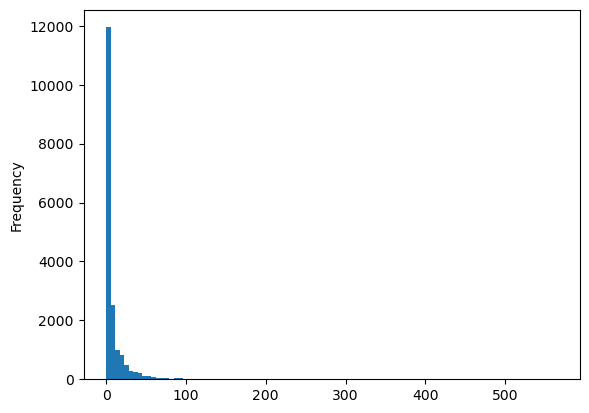

In [115]:
data.Nwage.plot(kind='hist', bins=100)

In [ ]:
data['International Reputation'].value_counts()